<a href="https://colab.research.google.com/github/hhdjwdabsxsx/Calories-Burned-Prediction/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from  sklearn.preprocesing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge, Lasso
from  sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

sns.set()

In [3]:
# Load the Calories dataset
df1 = pd.read_csv('calories.csv')
df1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
df1.shape

(15000, 2)

In [6]:
#Load the Exercise dataset
df2 = pd.read_csv('exercise.csv')
df2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
df2.shape

(15000, 8)

In [8]:
# Concatenate both the DataGrame i.e. df1 and df2
df = pd.concat([df1, df2], axis=1)
df.head()

,User_ID,Calories,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   User_ID     15000 non-null  int64  
 3   Gender      15000 non-null  object 
 4   Age         15000 non-null  int64  
 5   Height      15000 non-null  float64
 6   Weight      15000 non-null  float64
 7   Duration    15000 non-null  float64
 8   Heart_Rate  15000 non-null  float64
 9   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 1.1+ MB


In [10]:
df.describe()

,User_ID,Calories,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [11]:
df.isnull().sum()

,0
User_ID,0
Calories,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0


In [12]:
# drop User_ID column because this is not required from Main Dataframe itself
df.drop(columns = ["User_ID"], axis = 1, inplace = True)

In [13]:
df.head()

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Calories    15000 non-null  float64
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


Separate Categorical and Numerical Features


1. Categorical Feature


In [15]:
# Fetching Categorical Data
cat_col=[col for col in df.columns if df[col].dtype=='O']
cat_col

['Gender']

In [16]:
df["Gender"].value_counts()

,count
Gender,
female,7553
male,7447


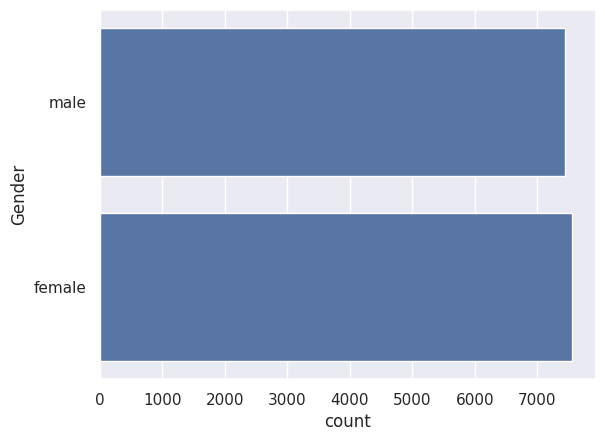

In [18]:
# plotting the gender column in count plot
sns.countplot(df['Gender'])
plt.show()


In [20]:
pd.get_dummies(df["Gender"], drop_first=True)

,male
0,True
1,False
2,True
3,False
4,False
...,...
14995,False
14996,False
14997,False
14998,True


In [21]:
categorical = df[cat_col]
categorical.head()

,Gender
0,male
1,female
2,male
3,female
4,female


In [22]:
categorical = pd.get_dummies(categorical["Gender"], drop_first = True)

In [23]:
categorical

,male
0,True
1,False
2,True
3,False
4,False
...,...
14995,False
14996,False
14997,False
14998,True


2. Numerical Features


In [24]:
Num_col = [col for col in df.columns if df[col].dtype != "0"]
Num_col

['Calories',
 'Gender',
 'Age',
 'Height',
 'Weight',
 'Duration',
 'Heart_Rate',
 'Body_Temp']

In [25]:
df[Num_col].shape

(15000, 8)

In [26]:
Numerical = df[Num_col]
Numerical.head()

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [27]:
Numerical.shape

(15000, 8)

Skipping column 'Gender' because it is not numeric.


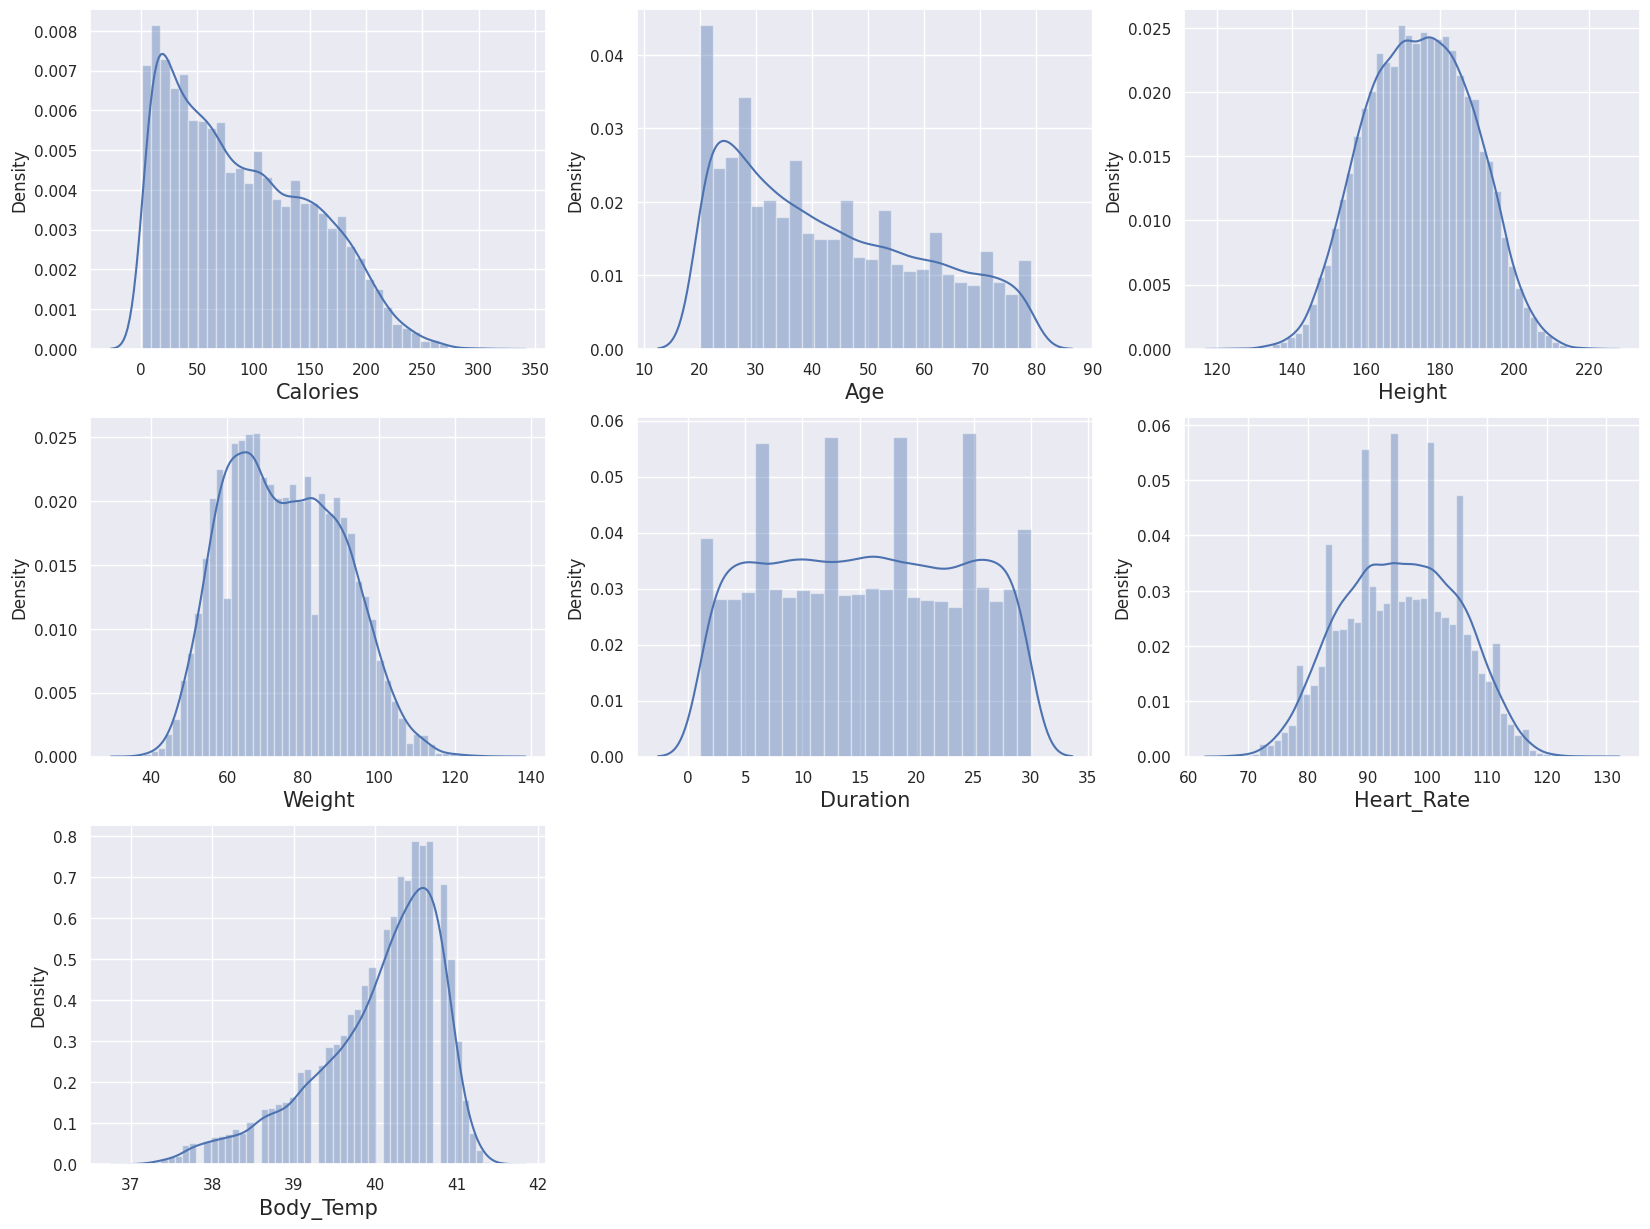

In [30]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in Numerical:
    # Check if the column contains numeric data
    if plotnumber <= 8 and Numerical[column].dtype in [np.int64, np.float64]:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(Numerical[column])
        plt.xlabel(column,fontsize=15)
        plotnumber+=1
    else:
        # Skip non-numeric columns
        print(f"Skipping column '{column}' because it is not numeric.")

plt.show()

<Axes: >

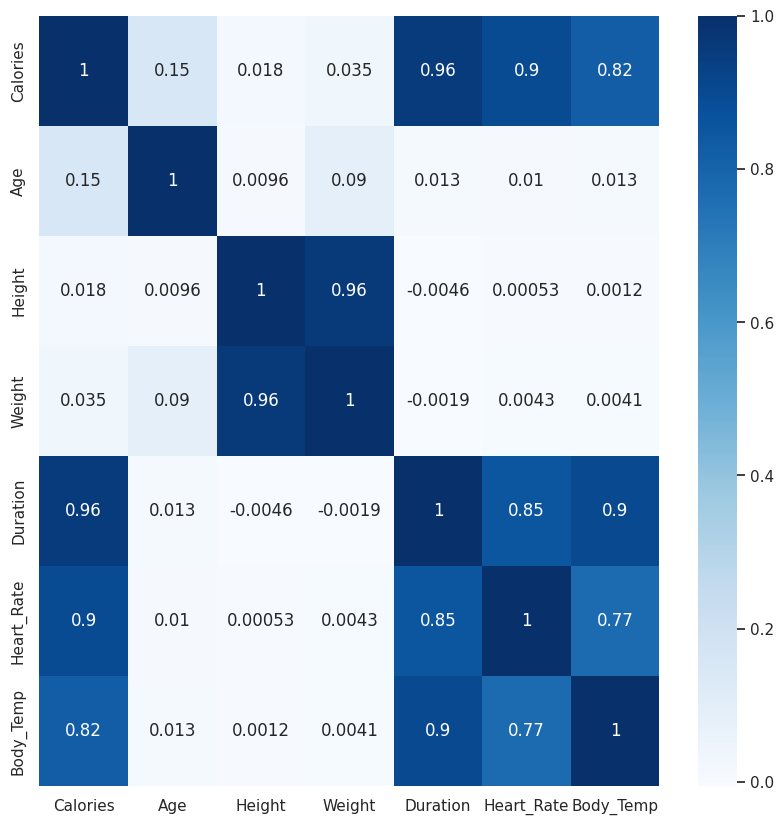

In [32]:
# Assuming 'Gender' is the only non-numeric column in the DataFrame
# we can add more columns to the list if needed

# Selecting only numeric columns for correlation
numeric_columns = Numerical.select_dtypes(include=np.number).columns
numeric_df = Numerical[numeric_columns]

plt.figure(figsize=(10, 10))
sns.heatmap(numeric_df.corr(), cmap='Blues', annot=True)

Concatenate Categorical and Numerical

In [33]:
data = pd.concat([categorical,Numerical], axis=1)

In [34]:
data.head()

,male,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,True,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,False,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,True,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,False,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,False,35.0,female,27,154.0,58.0,10.0,81.0,39.8


<Axes: >

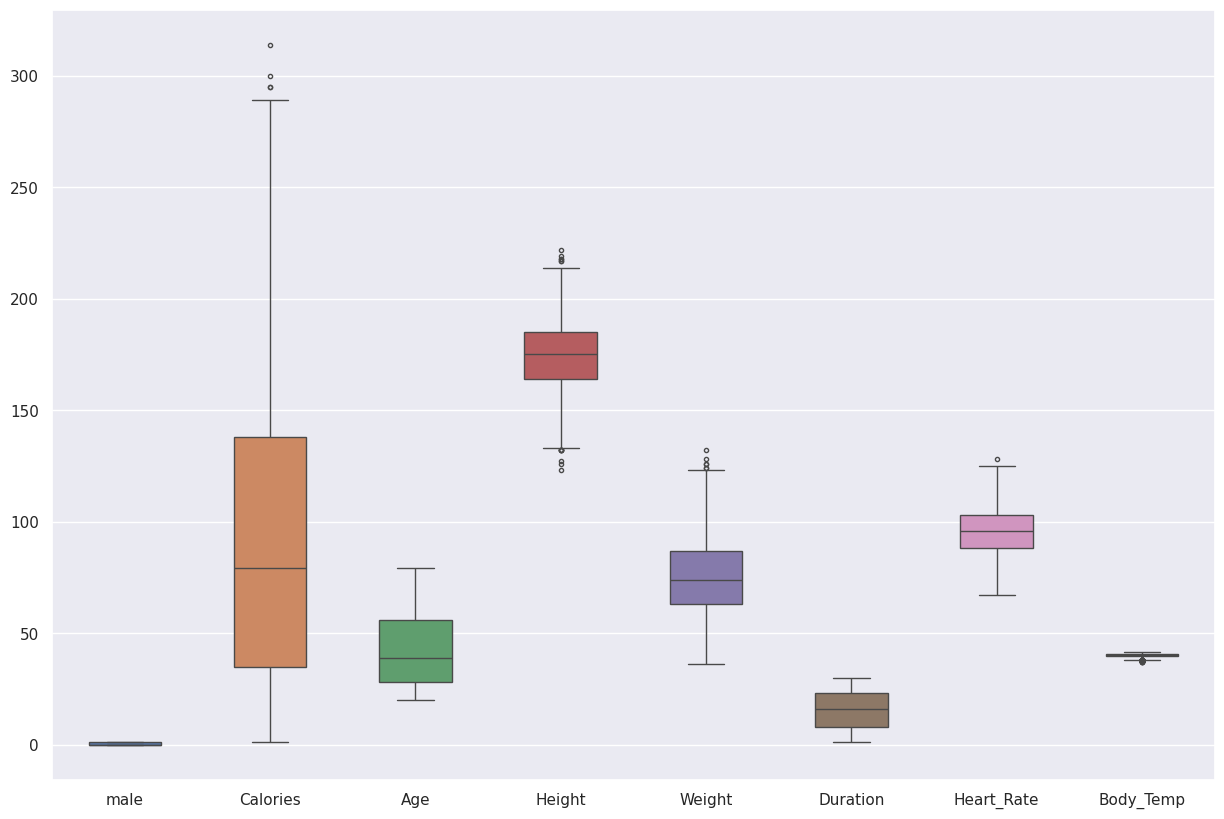

In [35]:
fig,ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=data,width = 0.5, fliersize = 3,ax=ax)

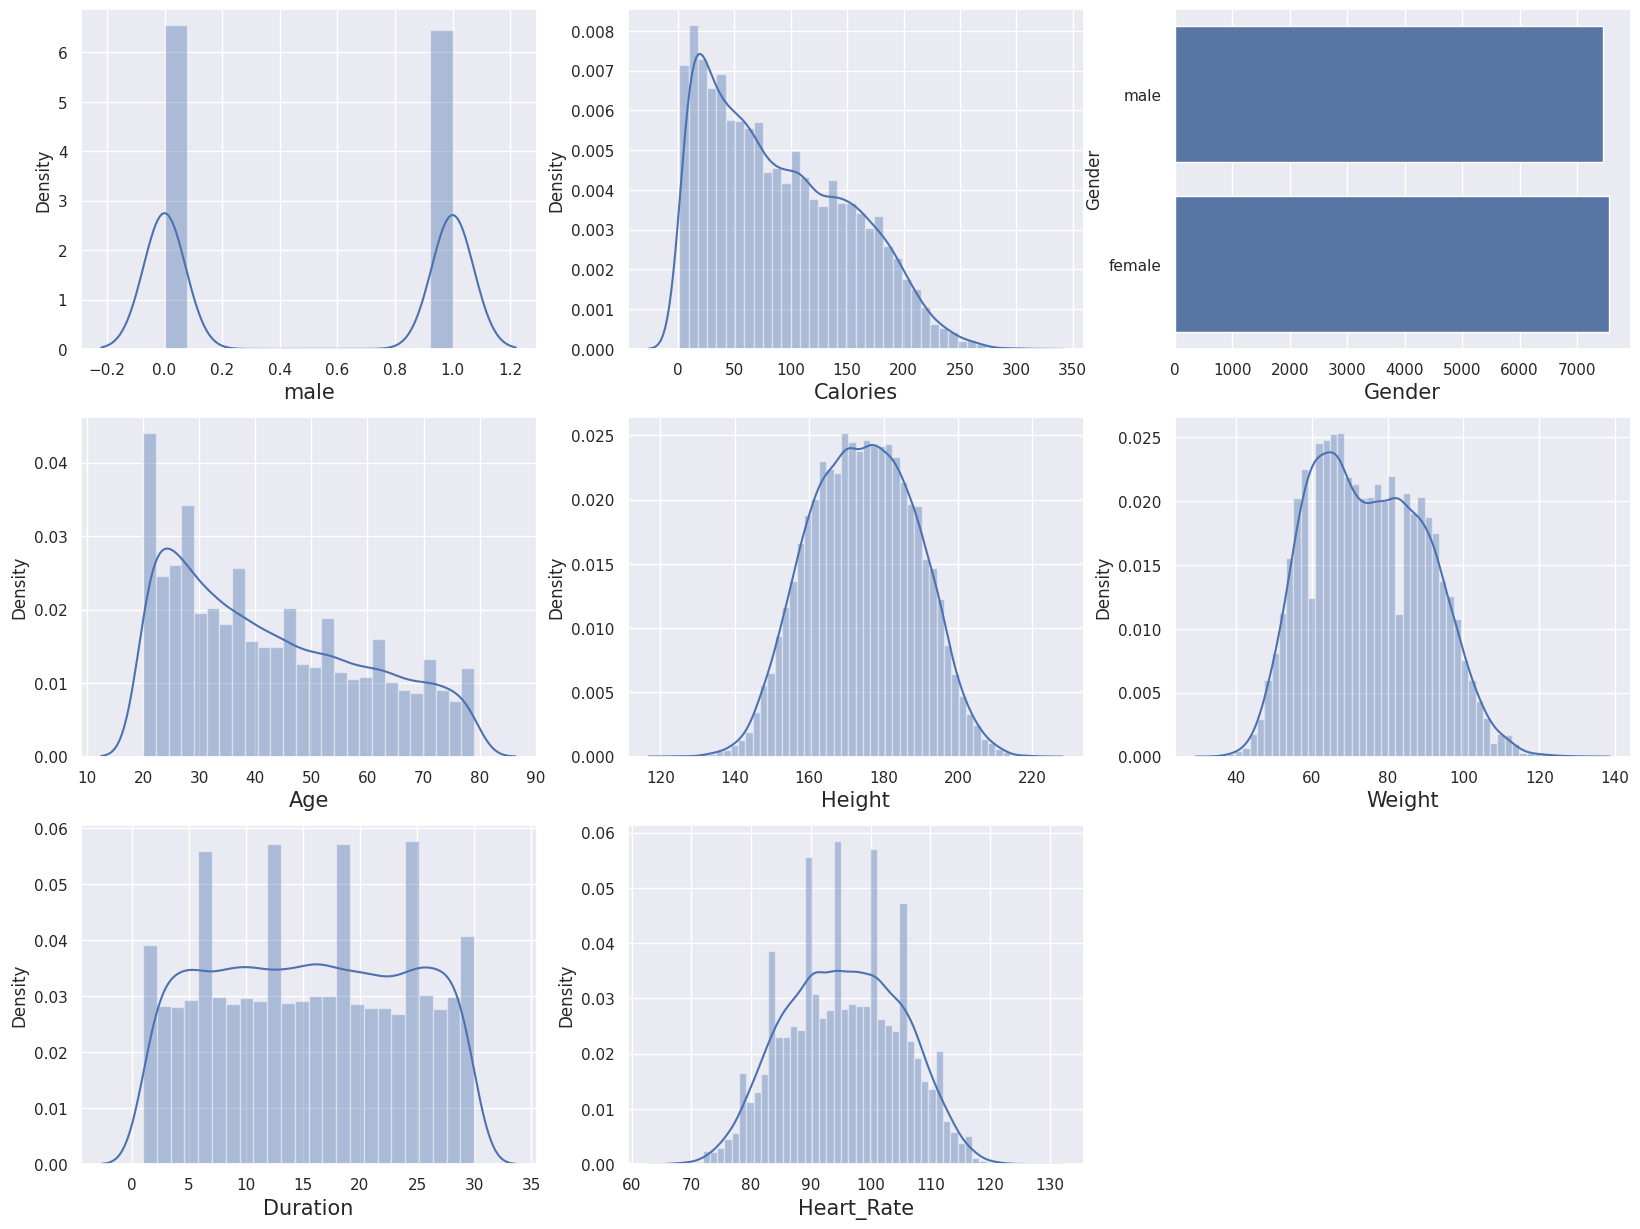

In [37]:
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in data:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    if data[column].dtype != object: # Check if the column is numerical
      sns.distplot(data[column])
    else:
      sns.countplot(data[column]) # Use countplot for categorical data
    plt.xlabel(column,fontsize = 15)
  plotnumber+=1
plt.show()

In [38]:
data.columns

Index(['male', 'Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

In [39]:
X = data.drop(columns = ["Calories"], axis = 1)
y = data["Calories"]

In [40]:
X.head()

,male,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,True,male,68,190.0,94.0,29.0,105.0,40.8
1,False,female,20,166.0,60.0,14.0,94.0,40.3
2,True,male,69,179.0,79.0,5.0,88.0,38.7
3,False,female,34,179.0,71.0,13.0,100.0,40.5
4,False,female,27,154.0,58.0,10.0,81.0,39.8


In [41]:
y.head()

,Calories
0,231.0
1,66.0
2,26.0
3,71.0
4,35.0


In [42]:
# Split the Data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [43]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (12000, 8)
Shape of X Test:  (3000, 8)
Shape of y Train:  (12000,)
Shape of y Test:  (3000,)


In [44]:
# from sklearn import metrics
def predict(ml_model):
  model=ml_model.fit(X_train, y_train)
  print('Score : {}'.format(model.score(X_train, y_train)))
  y_prediction=model.predict(X_test)
  print('predictions are: \n {}'.format(y_prediction))
  print('/n')

  r2_score=metrics.r2_score(y_test, y_prediction)
  print('r2 score: {}'.format(r2_score))

  print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))
  print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

  sns.distplot(y_test-y_prediction)

In [46]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 8.3 MB/s eta 0:00:00


XGB Regressor


In [52]:
import category_encoders as ce

Score : 0.9995380557081355
predictions are: 
 [197.06581   70.867226 196.99498  ...  29.043041 104.09284   14.61472 ]
/n
r2 score: 0.9986863132331905
MAE: 1.5521575984954834
MSE: 5.2744122853837005
RMSE: 2.2966088664340956


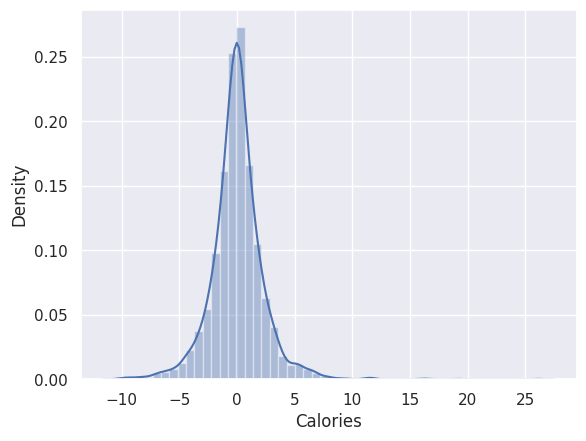

In [53]:
# Assuming X is your DataFrame containing features

# Create an OrdinalEncoder object
encoder = ce.OrdinalEncoder(cols=['Gender']) # Replace 'Gender' with your actual column name

# Fit the encoder on your training data and transform both training and testing data
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)


def predict(ml_model):
  model=ml_model.fit(X_train, y_train)
  print('Score : {}'.format(model.score(X_train, y_train)))
  y_prediction=model.predict(X_test)
  print('predictions are: \n {}'.format(y_prediction))
  print('/n')

  r2_score=metrics.r2_score(y_test, y_prediction)
  print('r2 score: {}'.format(r2_score))

  print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))
  print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

  sns.distplot(y_test-y_prediction)

regression = predict(XGBRegressor())
regression

Score : 1.0
predictions are: 
 [194.  75. 206. ...  30. 109.  13.]
/n
r2 score: 0.9923875718710038
MAE: 3.4896666666666665
MSE: 30.563666666666666
RMSE: 5.528441612847753


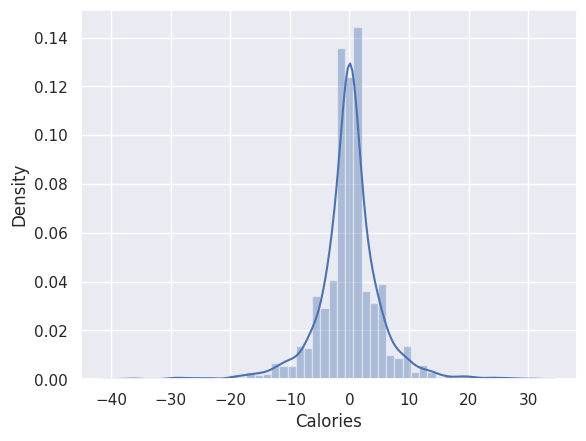

In [54]:
predict(DecisionTreeRegressor())

RandomForest Regression

Score : 0.9996784405078621
predictions are: 
 [197.39  65.9  196.89 ...  27.62 111.58  14.17]
/n
r2 score: 0.9976679487864327
MAE: 1.8182133333333337
MSE: 9.363114466666666
RMSE: 3.0599206634595393


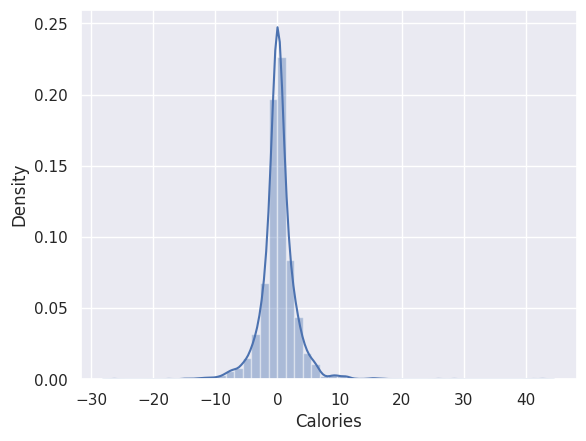

In [55]:
predict(RandomForestRegressor())